In [1]:
# dataset: Social_Network_Ads.csv
# location: https://mitu.co.in/dataset

### import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df.shape

(400, 5)

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# separate input and output data

x = df[['Age', 'EstimatedSalary']]  # i/p

y = df['Purchased']  # o/p

In [8]:
np.unique(y)

array([0, 1])

In [9]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

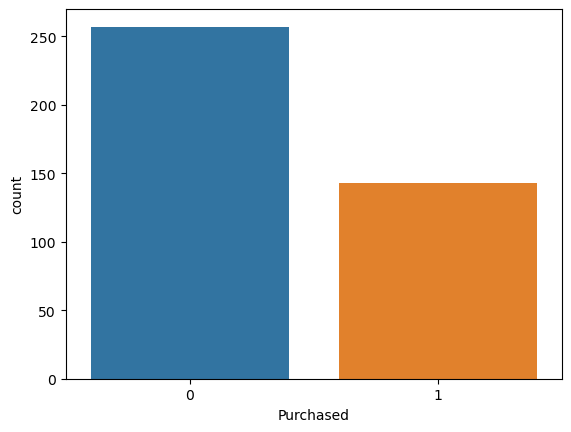

In [10]:
sns.countplot(x = y);

### Visualize the data

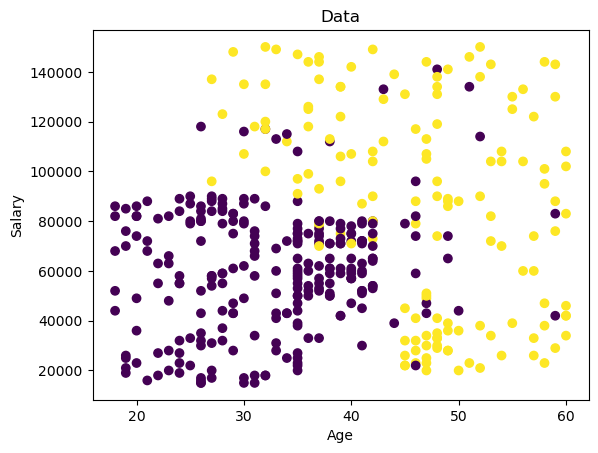

In [13]:
plt.title('Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'], x['EstimatedSalary'], c = y);

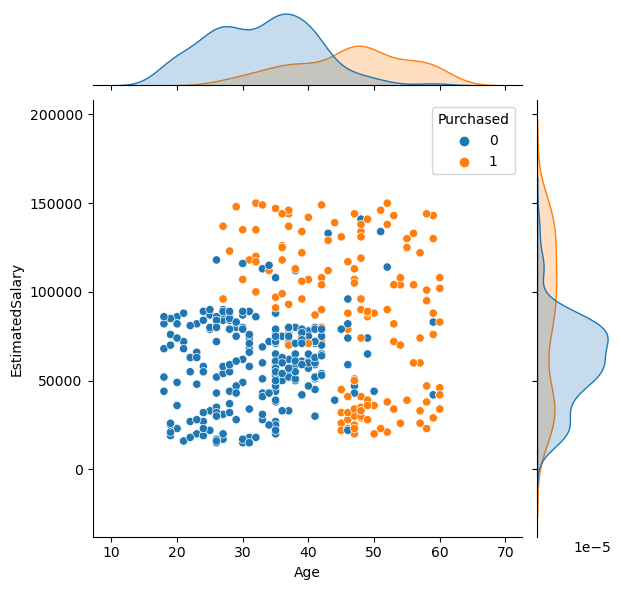

In [14]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased',
             data = df);

In [15]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


### Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

x_scaled = sca.fit_transform(x)

In [17]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


### Cross Validation

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [19]:
x_train.shape

(320, 2)

In [20]:
y_train.shape

(320,)

### Build the model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression()

log.fit(x_train, y_train)

LogisticRegression()

### predict on test data

In [23]:
y_pred = log.predict(x_test)

In [24]:
newdf = pd.DataFrame({
    'actual': y_test,
    'Predicted': y_pred
})

newdf

,actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
14,0,0
363,0,0
304,0,0
361,1,1


### Evaluation

In [25]:
# confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
confusion_matrix(y_test, y_pred)

array([[58,  0],
       [ 6, 16]])

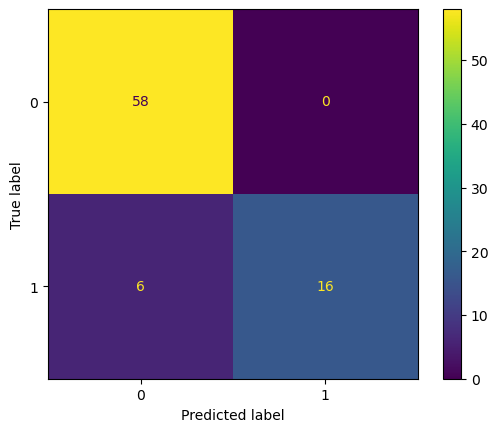

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [28]:
# classification report

from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [31]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.925

### predict on new value

In [37]:
new1 = [[20, 50000]]

In [38]:
log.predict(sca.transform(new1))

array([0])

In [39]:
new2 = [[70, 50000]]

In [40]:
log.predict(sca.transform(new2))

array([1])